# <b>Module 4. MeRIPseqPipe - an integrated nexflow pipeline </b>
--------------------------------------------


## Overview
<a href="https://academic.oup.com/bioinformatics/article/38/7/2054/6505200?login=true">MeRIPseqPipe</a> is an integrated analysis pipeline for MeRIP-seq data based on Nextflow. It provides an automatic pipeline that can provide users a friendly solution to perform in-depth mining of MeRIP-seq data. It integrates many functional analysis modules, range from basic processing to downstream analysis. All the processes are embedded in Nextflow with Docker support, which ensures high reproducibility and scalability of the analysis. MeRIPseqPipe is particularly suitable for analyzing a large number of samples at once with a simple command. The final output directory is structured based on each step and tool. And visualization reports containing various tables and plots are provided as HTML files.

## Learning Objectives
+ Learning Objective 1 
+ Learning Objective 2
    - Learning Objective 2.1
    - Learning Objective 2.2
+ Learning Objective 3

## Prerequisites
- List any APIs that should be enabled.
- List cloud platform account roles that must be assigned.
- List necessary cloud platform access.

## Get Started
This section should outline the steps to be completed for a given module, such as:
- Installing packages.
- Setting up environment.
- Establishing input and output directories.
- Downloading and storing analysis files.
- Running through analysis steps.
- Outputting data and visualizations.

## Conclusion
Provide an overview of the lessons and skills learned from the module.

In [1]:
# install nextflow
! conda install bioconda::nextflow -y
! conda install conda-forge::singularity -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - nvidia
 - pytorch
 - bioconda
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.7.1
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - bioconda::nextflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    coreutils-9.5              |       hd590300_0         2.9 MB  conda-forge
    nextflow-24.10.2           |       hdfd78af_0        29.5 MB  bioconda
    openjdk-17.0.13            |       he018374_0       161.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       194.2 MB

The following NEW package

In [2]:
! docker pull kingzhuky/meripseqpipe:dev
! docker images

dev: Pulling from kingzhuky/meripseqpipe

62c62ec6: Pulling fs layer 
c0154f16: Pulling fs layer 
7b5da8fb: Pulling fs layer 
79e18102: Pulling fs layer 
47f27afc: Pulling fs layer 
f8747251: Pulling fs layer 
ebbfce0d: Pulling fs layer 
69278885: Pulling fs layer 
a0c06f01: Pulling fs layer 
631fe8c6: Pulling fs layer 
d79cf9d3: Pulling fs layer 
4833bd6e: Pulling fs layer 
a4775478: Pulling fs layer 
5fc5d787: Pull complete .03MB/29.03MBBExtracting  239.5MB/1.162GBDigest: sha256:5097486f27efdc46b7d2b587e03acd2743fbd40e0346ab874996d9855316d676
Status: Downloaded newer image for kingzhuky/meripseqpipe:dev
docker.io/kingzhuky/meripseqpipe:dev
REPOSITORY               TAG       IMAGE ID       CREATED       SIZE
kingzhuky/meripseqpipe   dev       9e9f8a160a5e   3 years ago   4.81GB


In [3]:
! git clone https://github.com/canceromics/MeRIPseqPipe.git Tutorial_4/meripseqpipe 

fatal: destination path 'Tutorial_4/meripseqpipe' already exists and is not an empty directory.


In [4]:
! nextflow run Tutorial_4/meripseqpipe -profile singularity


 N E X T F L O W   ~  version 24.10.2

Nextflow DSL1 is no longer supported — Update your script to DSL2, or use Nextflow 22.10.x or earlier


## Clean up
A reminder to shutdown VM and delete any relevant resources. <br><br>

<br>

## Additional Notebook Options & Functionalities

---------------------------------

### Use alert cells to communicate important messages or information

<div class="alert alert-block alert-danger"> <b>Warning:</b> Here is a warning. Please take appropriate action</a>. </div>
<div class="alert alert-block alert-warning"> <b>Attention:</b> Please take note</a>. </div>
<div class="alert alert-block alert-success"> <b>Success:</b> Your action was successful</a>. </div>
<div class="alert alert-block alert-info"> <b>Tip:</b> Try this</a>. </div>

https://fontawesome.com/search?q=warning&o=r&m=free
<div style="border: 1px solid #659078; padding: 0px; border-radius: 4px;">
  <div style="background-color: #d4edda; padding: 5px; font-weight: bold;">
    <i class="fas fa-lightbulb" style="color: #0e4628;margin-right: 5px;"></i><a style="color: #0e4628">Tips</a>
  </div>
  <p style="margin-left: 5px;">
text: abcdefghijklmnopqrstuvwxyz
  </p>
  <p>

  </p>
</div>
warning messages:
<div style="border: 1px solid #ffe69c; padding: 0px; border-radius: 4px;">
  <div style="background-color: #fff3cd; padding: 5px; font-weight: bold;">
    <i class="fas fa-exclamation-triangle" style="color: #664d03;margin-right: 5px;"></i><a style="color: #664d03">yellow Warning</a>
  </div>
  <p style="margin-left: 5px;">
yellow Warning: abcdefghijklmnopqrstuvwxyz
  </p>
  <p>
  </p>
</div>

warning messages (red):
<div style="border: 1px solid #e57373; padding: 0px; border-radius: 4px;">
  <div style="background-color: #ffcdd2; padding: 5px; font-weight: bold;">
    <i class="fas fa-exclamation-triangle" style="color: #b71c1c;margin-right: 5px;"></i><a style="color: #b71c1c">Warning</a>
  </div>
  <p style="margin-left: 5px;">
Warning: abcdefghijklmnopqrstuvwxyz
  </p>
  <p>
  </p>
</div>

Note messages:
<div style="border: 1px solid #9ec5fe; padding: 0px; border-radius: 4px;">
  <div style="background-color: #cfe2ff; padding: 5px; font-weight: bold;">
    <i class="fas fa-file-alt" style="color: #052c65;margin-right: 5px;"></i><a style="color: #052c65">Notes</a>
  </div>
  <p style="margin-left: 5px;">
Notes: abcdefghijklmnopqrstuvwxyz
  </p>
  <p>
  </p>
</div>




### Stylize markdown cells and text

<p style="background:blue;color:white;font-family:times new roman"> Change cell background, text color, and/or font. </p>
<code style="background:black;color:white">>Make text look similar to command line. </code>

**This is bold text.** <br>
Another way to <b>bold</b> text. <br><br>
*This is italicized text.* <br>
Another way to <i>italicize</i> text. <br><br>
<mark>Emphasize</mark> a section of text. <br><br>
Insert LateX equations: $\sqrt{n}$

### Code syntax highlighting

```python
def my_python_function():
  print("Hello from a function")
```

### Create tables

##### Using markdown syntax
|Name|Address|Salary| 
|-----|-------|------| 
|Hanna|Brisbane|5000| 
|Adam|Sydney|4000|

##### Using HTML syntax
<table>
<thead>
<tr><th>Name</th><th>Address</th><th>Salary</th></tr>
</thead>
<tbody>
<tr><td>Hanna</td><td>Brisbane</td><td>5000</td></tr>
<tr><td>Adam</td><td>Sydney</td><td>4000</td></tr>
</tbody>
</table>

### Provide additional details through dropdowns or hover text

<details>
<summary>Click for help</summary>
<br>
Put your detailed instructions, command, or helpful hint(s) here.
</details>

<span title="Here is where you should put more detailed instructions.">Hover mouse over this text for further instructions</span>

### Display links

[Link To Nextflow Intro Video](https://www.youtube.com/watch?v=wbtMbJTo1xo)

<br>

## Notebook Embeddings
---------------------------------

### Embed images

![myimage](images/OIP.jpeg)

### Embed videos

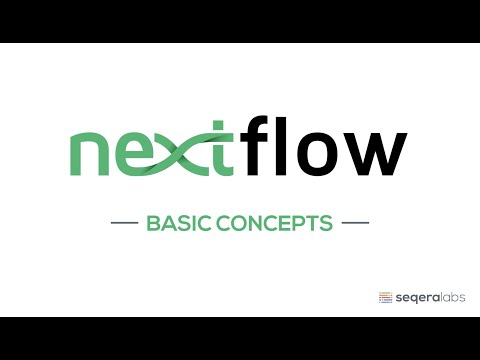

In [5]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo(id='T9fbAkgINf0', height=200, width=400)

In [6]:
from IPython.display import Video

#Sample from vimeo
Video("videos/sample-mp4-file.mp4",width=400, height=200)

In [7]:
from IPython.display import VimeoVideo
VimeoVideo(id='281123163', width=400, height=200)

### Embed html files

In [8]:
from IPython.display import IFrame
IFrame(src='html/gut_1_fastqc.html', width=900, height=600)

### Embed interactive IGV browser

In [9]:
%pip install --user igv-notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.4/765.4 kB 42.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import igv_notebook

igv_notebook.init()

ModuleNotFoundError: No module named 'igv_notebook'

In [ ]:
b1 = igv_notebook.Browser(
    {
        "genome": "hg19",
        "locus": "chr22:24,376,166-24,376,456",
    }
)

Visit the [ivgteam](https://github.com/igvteam/igv-notebook) Github page for additional information. <br><br>
Or refer to our past workshop on [using igv-notebook in jupyter](reference_notebooks/igv_template.ipynb).

<br>

## Quizzes & Flashcards
---------------------------------

### Insert quizzes

In [ ]:
#Install jupyterquiz library
%pip install jupyterquiz

In [ ]:
#Load jupyterquiz library
from jupyterquiz import display_quiz

In [ ]:
#Display quiz as html
#Instructions for creating quiz .json files and converting to html provided in the links below
from IPython.display import IFrame
IFrame('html/quiz_example.html', width=800, height=400)

### Insert flashcards

In [ ]:
#Install jupytercards library
%pip install jupytercards

In [ ]:
#Display flashcard as html
#Instructions for creating flashcard .json files and converting to html provided in the links below
from IPython.display import IFrame
IFrame('html/flashcard_example.html', width=600, height=600)

For more details on constructing and embedding quizzes and flashcards using Python refer to this [notebook](reference_notebooks/python_quiz_template.ipynb). <br><br>
For details on constructing and embedding quizzes and flashcards within a notebook using R refer to this [notebook](reference_notebooks/r_quiz_template.ipynb).

<br>

# Data Figures & Graphics

---------------------------------------------------

### Data visualization with python

In [ ]:
#Install libraries
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install pyvis
%pip install ipycytoscape

In [ ]:
#Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#### Make volcano plots

In [ ]:
toptable = pd.read_csv('viz_data/Toptable_VolcanoPlot.txt', sep='\t')

# Declare significance thresholds
sig = 0.05
FC = 0.6

toptable['Significance'] = np.where((toptable['logFC'] > FC) & 
                                    (toptable['P.Value'] < sig), 'Up', 
                           np.where((toptable['logFC'] < -FC) &
                                    (toptable['P.Value'] < sig), 'Down','Not_Sig'))
# Count of Significance level
toptable['Significance'].value_counts()

# Add color to the plot based on the values above with the hue parameter
sns.scatterplot(x='logFC', y=-np.log10(toptable['adj.P.Val']), hue='Significance', data=toptable)
plt.show()

#### Make heatmaps

In [ ]:
# generate a matrix, red pill or blue pill?
np.random.seed(100)

nr1 = 4
nr2 = 8
nr3 = 6
nr = nr1 + nr2 + nr3
nc1 = 6
nc2 = 8
nc3 = 10
nc = nc1 + nc2 + nc3

mat1 = np.random.normal(1, 0.5, (nr1, nc1))
mat2 = np.random.normal(0, 0.5, (nr2, nc1))
mat3 = np.random.normal(0, 0.5, (nr3, nc1))
mat4 = np.random.normal(0, 0.5, (nr1, nc2))
mat5 = np.random.normal(1, 0.5, (nr2, nc2))
mat6 = np.random.normal(0, 0.5, (nr3, nc2))
mat7 = np.random.normal(0.5, 0.5, (nr1, nc3))
mat8 = np.random.normal(0.5, 0.5, (nr2, nc3))
mat9 = np.random.normal(1, 0.5, (nr3, nc3))

mat = np.concatenate((np.concatenate((mat1, mat2, mat3), axis=0),
                      np.concatenate((mat4, mat5, mat6), axis=0),
                      np.concatenate((mat7, mat8, mat9), axis=0)), axis=1)

mat = np.array(mat)
np.random.shuffle(mat)
np.random.shuffle(mat.T)

row_names = ["row"+str(i) for i in range(1,nr+1)]
col_names = ["column"+str(i) for i in range(1,nc+1)]

mat = pd.DataFrame(mat, index=row_names, columns=col_names)

# hate the default colors, so let's match it with the colors from the R notebook
from matplotlib.colors import LinearSegmentedColormap
red_white_blue = LinearSegmentedColormap.from_list("rbw",["red","white","blue"])

sns.heatmap(mat,annot=False,cmap=red_white_blue, linewidth=.5)
plt.show()

#### Make gene networks

In [ ]:
#Load additional network visualization libraries
from pyvis.network import Network
#from ipycytoscape import CytoscapeWidget #only needed if want to produce widget below
import networkx as nx
import requests

In [ ]:
# Create a Network object
net = Network(notebook=True, cdn_resources='remote')

# Add nodes to the network
net.add_node("A", label = "Gene A")
net.add_node("B", label = "Gene B")
net.add_node("C", label = "Gene C")

# Add edges to the network
net.add_edge("A", "B")
net.add_edge("B", "C")
net.add_edge("C", "A")

# Show the network
net.show("network_example.html")

In [ ]:
#create a list of proteins or genes of interest
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list)

url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 


In [ ]:
df.head()

In [ ]:
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']] 

G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)

#cyto = CytoscapeWidget()
#cyto.graph.add_graph_from_networkx(G)

#display(cyto)
plt.axis('off')
plt.show()

### Data visualization with R
[Open R Notebook](./reference_notebooks/r_viz_template.ipynb)